In [48]:
import networkx
import numpy as np
import importlib
import quasibi
import glob
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
importlib.reload(quasibi);

In [291]:
qbo = pd.read_fwf("../data/qbo.txt", skiprows=9, header=None, usecols=[1, 8], index_col=0)
qbo.index = [datetime(year=1953 + month//12, month=month%12 + 1, day=1) for month in range(len(qbo))]
qbo = qbo[(qbo.index.year > 1981) & (qbo.index.year < 2021)]
qbo = qbo[(qbo.index.month >= 10) | (qbo.index.month <= 3)]
qbo = qbo.groupby(qbo.index.year - (qbo.index.month <= 3)).mean()
qbo = qbo.to_numpy().flatten()
qbo

array([-309.33333333,  143.33333333, -258.5       ,   16.66666667,
        127.16666667, -259.83333333,   71.5       ,  -73.83333333,
       -143.33333333,  116.5       , -247.33333333,  153.        ,
       -227.16666667,  107.66666667, -159.33333333,  -76.83333333,
        -32.16666667,    6.33333333,   80.16666667, -268.66666667,
         74.83333333,  -21.83333333, -104.        ,   21.        ,
       -212.5       ,   62.66666667, -146.16666667,  111.83333333,
       -252.66666667,  102.        , -195.16666667, -128.66666667,
        123.5       , -301.5       ,   95.83333333,  162.66666667,
       -277.83333333,  123.5       ,   41.66666667,  127.66666667])

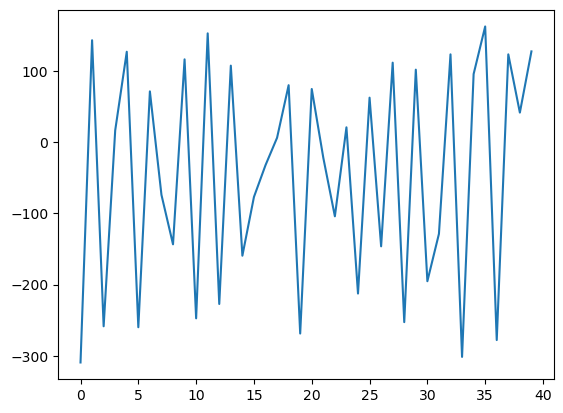

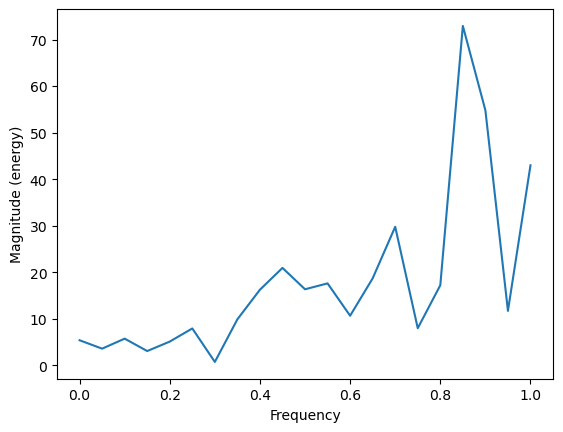

In [293]:
plt.plot(qbo)
plt.show()
plt.magnitude_spectrum(qbo - np.mean(qbo))
plt.show()

In [3]:
pearson_files = glob.glob("../output/dynamic/pearson*")

In [43]:
last = None
hamming = []
gcc = []

for i, pearson_file in enumerate(pearson_files):
    pearson = quasibi.load_symmat(pearson_file)
    pearson = np.abs(pearson) >= np.quantile(np.abs(pearson), 0.995)

    if i > 0:
        # hamming distance
        hamming.append(np.mean(pearson ^ last))
        # global clustering coefficient
        gcc.append(networkx.average_clustering(networkx.from_numpy_matrix(pearson)))

    last = pearson

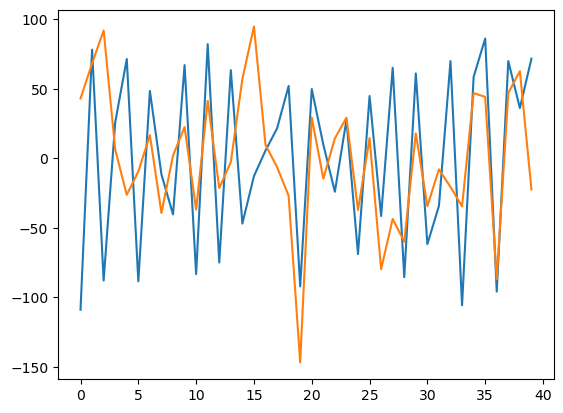

In [260]:
plt.plot(10000*(qbo_index - np.mean(qbo_index))/np.var(qbo_index))
plt.plot((gcc - np.mean(gcc))/np.var(gcc))

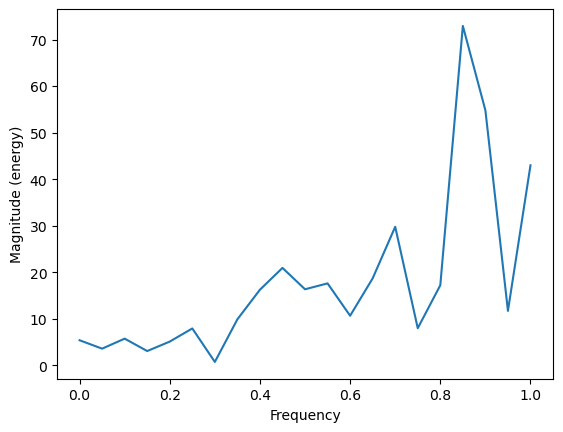

(array([0.00339487, 0.0045652 , 0.00377054, 0.00284153, 0.00656989,
        0.00781122, 0.00697344, 0.00368938, 0.00294434, 0.00242174,
        0.00117111, 0.00184704, 0.00292811, 0.00370163, 0.00591911,
        0.00402821, 0.0042333 , 0.00677588, 0.00563786, 0.00175734,
        0.00120484]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <matplotlib.lines.Line2D at 0x7ff65b9e8760>)

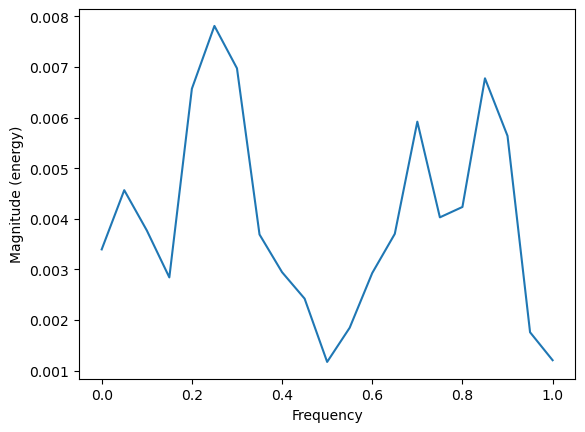

In [267]:
plt.magnitude_spectrum(qbo[8] - np.mean(qbo[8]))
plt.show()
plt.magnitude_spectrum(gcc - np.mean(gcc))